# A Gentle Introduction to Statistical Tolerance Intervals in Machine Learning
It can be useful to have an upper and lower limit on data.

These bounds can be used to help identify anomalies and set expectations for what to expect. A bound on observations from a population is called a tolerance interval.

A tolerance interval is different from a prediction interval that quantifies the uncertainty for a single predicted value. It is also different from a confidence interval that quantifies the uncertainty of a population parameter such as a mean. Instead, a tolerance interval covers a proportion of the population distribution.

In this tutorial, you will discover statistical tolerance intervals and how to calculate a tolerance interval for Gaussian data.

After completing this tutorial, you will know:

* That statistical tolerance intervals provide a bounds on observations from a population.
* That a tolerance interval requires that both a coverage proportion and confidence be specified.
* That the tolerance interval for a data sample with a Gaussian distribution can be easily calculated.

Let’s get started.

## Tutorial Overview
This tutorial is divided into 4 parts; they are:

1. Bounds on Data
2. What Are Statistical Tolerance Intervals?
3. How to Calculate Tolerance Intervals
4. Tolerance Interval for Gaussian Distribution

## Bounds on Data
It is useful to put bounds on data.

For example, if you have a sample of data from a domain, knowing the upper and lower bound for normal values can be helpful for identifying anomalies or outliers in the data.

For a process or model that is making predictions, it can be helpful to know the expected range that sensible predictions may take.

Knowing the common range of values can help with setting expectations and detecting anomalies.

The range of common values for data is called a tolerance interval.

## What Are Statistical Tolerance Intervals?
The tolerance interval is a bound on an estimate of the proportion of data in a population.

The interval is limited by the sampling error and by the variance of the population distribution. Given the law of large numbers, as the sample size is increased, the probabilities will better match the underlying population distribution.

Below is an example of a stated tolerance interval:

*The range from x to y covers 95% of the data with a confidence of 99%.*

If the data is Gaussian, the interval can be expressed in the context of the mean value; for example:

*x +/- y covers 95% of the data with a confidence of 99%.*

We refer to these intervals as statistical tolerance intervals, to differentiate them from tolerance intervals in engineering that describe limits of acceptability, such as for a design or of a material. Generally, we will describe them as simply “tolerance intervals” for convenience.

A tolerance interval is defined in terms of two quantities:

* Coverage: The proportion of the population covered by the interval.
* Confidence: The probabilistic confidence that the interval covers the proportion of the population.

## How to Calculate Tolerance Intervals
The size of a tolerance interval is proportional to the size of the data sample from the population and the variance of the population.

There are two main methods for calculating tolerance intervals depending on the distribution of data: parametric and nonparametric methods.

* Parametric Tolerance Interval: Use knowledge of the population distribution in specifying both the coverage and confidence. Often used to refer to a Gaussian distribution.
* Nonparametric Tolerance Interval: Use rank statistics to estimate the coverage and confidence, often resulting less precision (wider intervals) given the lack of information about the distribution.

Tolerance intervals are relatively straightforward to calculate for a sample of independent observations drawn from a Gaussian distribution. We will demonstrate this calculation in the next section.

## Tolerance Interval for Gaussian Distribution
In this section, we will work through an example of calculating the tolerance intervals on a data sample.

First, let’s define our data sample. We will create a sample of 100 observations drawn from a Gaussian distribution with a mean of 50 and a standard deviation of 5.

In [ ]:
# generate dataset
data = 5 * randn(100) + 50

During the example, we will assume that we are unaware of the true population mean and standard deviation, and that these values must be estimated.

Because the population parameters have to be estimated, there is additional uncertainty. For example, for a 95% coverage, we could use 1.96 (or 2) standard deviations from the estimated mean as the tolerance interval. We must estimate the mean and standard deviation from the sample and take this uncertainty into account, therefore the calculation of the interval is slightly more complex.

Next, we must specify the number of degrees of freedom. This will be used in the calculation of critical values and in the calculation of the interval. Specifically, it is used in the calculation of the standard deviation.

Remember that the degrees of freedom are the number of values in the calculation that can vary. Here, we have 100 observations, therefore 100 degrees of freedom. We do not know the standard deviation, therefore it must be estimated using the mean. This means our degrees of freedom will be (N – 1) or 99.

In [ ]:
# specify degrees of freedom
n = len(data)
dof = n - 1

Next, we must specify the proportional coverage of the data. In this example, we are interested in the middle 95% of the data. The proportion is 95. We must shift this proportion so that it covers the middle 95%, that is from 2.5th percentile to the 97.5th percentile.

We know that the critical value for 95% is 1.96 given that we use it so often; nevertheless, we can calculate it directly in Python given the percentage 2.5% of the inverse survival function. This can be calculated using the norm.isf() SciPy function.

In [ ]:
# specify data coverage
prop = 0.95
prop_inv = (1.0 - prop) / 2.0
gauss_critical = norm.isf(prop_inv)

Next, we need to calculate the confidence of the coverage. We can do this by retrieving the critical value from the Chi Squared distribution for the given number of degrees of freedom and desired probability. We can use the chi2.isf() SciPy function.

In [ ]:
# specify confidence
prob = 0.99
chi_critical = chi2.isf(q=prob, df=dof)

We now have all of the pieces to calculate the Gaussian tolerance interval. The calculation is as follows:

In [ ]:
interval = sqrt((dof * (1 + (1/n)) * gauss_critical^2) / chi_critical)

Where dof is the number of degrees of freedom, n is the size of the data sample, gauss_critical is the critical value, such as 1.96 for 95% coverage of the population, and chi_critical is the Chi Squared critical value for the desired confidence and degrees of freedom.

In [ ]:
interval = sqrt((dof * (1 + (1/n)) * gauss_critical**2) / chi_critical)

We can tie all of this together and calculate the Gaussian tolerance interval for our data sample.

The complete example is listed below.

In [1]:
# parametric tolerance interval
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import sqrt
from scipy.stats import chi2
from scipy.stats import norm
# seed the random number generator
seed(1)
# generate dataset
data = 5 * randn(100) + 50
# specify degrees of freedom
n = len(data)
dof = n - 1
# specify data coverage
prop = 0.95
prop_inv = (1.0 - prop) / 2.0
gauss_critical = norm.isf(prop_inv)
print('Gaussian critical value: %.3f (coverage=%d%%)' % (gauss_critical, prop*100))
# specify confidence
prob = 0.99
chi_critical = chi2.isf(q=prob, df=dof)
print('Chi-Squared critical value: %.3f (prob=%d%%, dof=%d)' % (chi_critical, prob*100, dof))
# tolerance
interval = sqrt((dof * (1 + (1/n)) * gauss_critical**2) / chi_critical)
print('Tolerance Interval: %.3f' % interval)
# summarize
data_mean = mean(data)
lower, upper = data_mean-interval, data_mean+interval
print('%.2f to %.2f covers %d%% of data with a confidence of %d%%' % (lower, upper, prop*100, prob*100))

Gaussian critical value: 1.960 (coverage=95%)
Chi-Squared critical value: 69.230 (prob=99%, dof=99)
Tolerance Interval: 2.355
47.95 to 52.66 covers 95% of data with a confidence of 99%


Running the example first calculates and prints the relevant critical values for the Gaussian and Chi Squared distributions. The tolerance is printed, then presented correctly.

It can also be helpful to demonstrate how the tolerance interval will decrease (become more precise) as the size of the sample is increased.

The example below demonstrates this by calculating the tolerance interval for different sample sizes for the same small contrived problem.

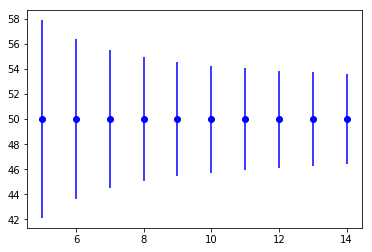

In [2]:
# plot tolerance interval vs sample size
from numpy.random import seed
from numpy.random import randn
from numpy import sqrt
from scipy.stats import chi2
from scipy.stats import norm
from matplotlib import pyplot
%matplotlib inline
# seed the random number generator
seed(1)
# sample sizes
sizes = range(5,15)
for n in sizes:
	# generate dataset
	data = 5 * randn(n) + 50
	# calculate degrees of freedom
	dof = n - 1
	# specify data coverage
	prop = 0.95
	prop_inv = (1.0 - prop) / 2.0
	gauss_critical = norm.isf(prop_inv)
	# specify confidence
	prob = 0.99
	chi_critical = chi2.isf(q=prob, df=dof)
	# tolerance
	tol = sqrt((dof * (1 + (1/n)) * gauss_critical**2) / chi_critical)
	# plot
	pyplot.errorbar(n, 50, yerr=tol, color='blue', fmt='o')
# plot results
pyplot.show()

Running the example creates a plot showing the tolerance interval around the true population mean.

We can see that the interval becomes smaller (more precise) as the sample size is increased from 5 to 15 examples.

## Summary
In this tutorial, you discovered statistical tolerance intervals and how to calculate a tolerance interval for Gaussian data.

Specifically, you learned:

* That statistical tolerance intervals provide a bounds on observations from a population.
* That a tolerance interval requires that both a coverage proportion and confidence be specified.
* That the tolerance interval for a data sample with a Gaussian distribution can be easily calculated.